Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart_disease_data.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

In [36]:
## apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()
treeclassifier.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.49027777777777776, 0.9444444444444444, 'x[2] <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]'),
 Text(0.2777777777777778, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.373\nsamples = 113\nvalue = [85, 28]'),
 Text(0.2, 0.7222222222222222, 'x[12] <= 2.5\ngini = 0.498\nsamples = 51\nvalue = [24, 27]'),
 Text(0.1111111111111111, 0.6111111111111112, 'x[8] <= 0.5\ngini = 0.358\nsamples = 30\nvalue = [7, 23]'),
 Text(0.044444444444444446, 0.5, 'x[4] <= 316.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.022222222222222223, 0.3888888888888889, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.06666666666666667, 0.3888888888888889, 'x[7] <= 163.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.044444444444444446, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08888888888888889, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17777777777777778, 0.5, 'x[10] <= 1.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0

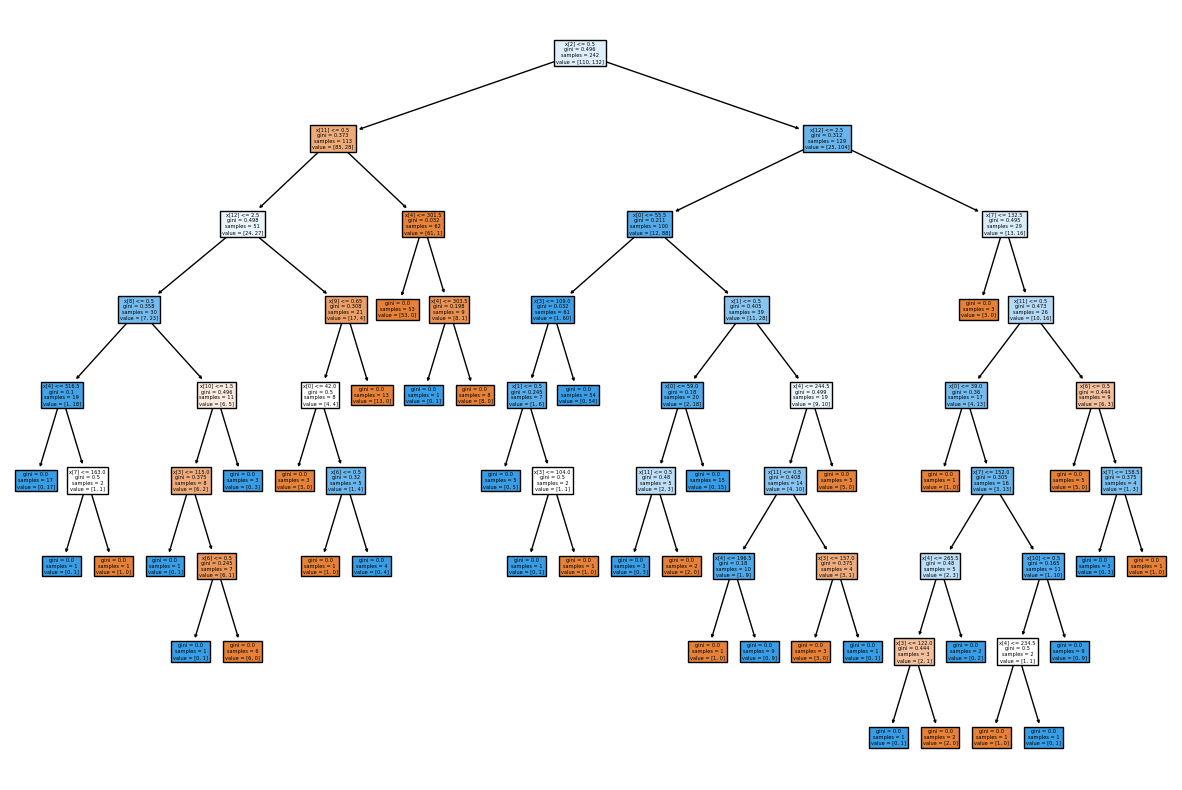

In [34]:
##Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

Model Evaluation

In [37]:
y_pred_train=treeclassifier.predict(X_train)
y_pred=treeclassifier.predict(X_test)


In [38]:
from sklearn.metrics import accuracy_score

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, Y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, Y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.7540983606557377


In [74]:
dt = DecisionTreeClassifier(max_depth= 7)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=7)

In [75]:
y_pred_train=dt.predict(X_train)
y_pred=dt.predict(X_test)


print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, Y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, Y_test))

Accuracy of Decision Tree-Train:  0.9917355371900827
Accuracy of Decision Tree-Test:  0.7868852459016393


Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)


RandomForestClassifier()

In [89]:
y_pred_train=model.predict(X_train)
y_pred=model.predict(X_test)


print('Accuracy of Train: ', accuracy_score(y_pred_train, Y_train))
print('Accuracy of Test: ', accuracy_score(y_pred, Y_test))

Accuracy of Train:  1.0
Accuracy of Test:  0.7868852459016393


In [90]:
cm=confusion_matrix(Y_test,y_pred)
print(cm)
print(classification_report(Y_test,y_pred))

[[22  6]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



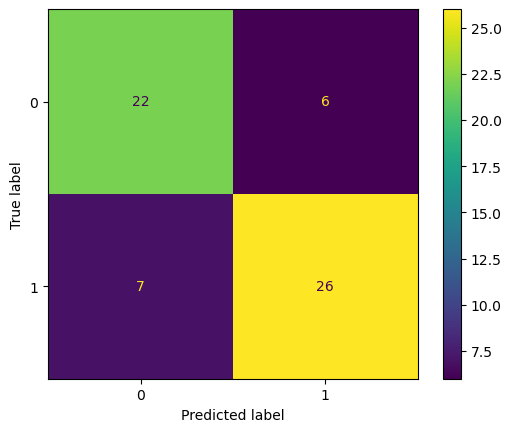

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB

naive=GaussianNB()
naive.fit(X_train, Y_train)

GaussianNB()

In [103]:
y_pred_train=naive.predict(X_train)
y_pred=naive.predict(X_test)


print('Accuracy of Train: ', accuracy_score(y_pred_train, Y_train))
print('Accuracy of Test: ', accuracy_score(y_pred, Y_test))

Accuracy of Train:  0.8471074380165289
Accuracy of Test:  0.819672131147541


In [99]:
cm=confusion_matrix(Y_test,y_pred)
print(cm)
print(classification_report(Y_test,y_pred))

[[25  3]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.89      0.76      0.82        33

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

c:\Users\MA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
y_pred_train=model.predict(X_train)
y_pred=model.predict(X_test)


print('Accuracy of Train: ', accuracy_score(y_pred_train, Y_train))
print('Accuracy of Test: ', accuracy_score(y_pred, Y_test))

Accuracy of Train:  0.8512396694214877
Accuracy of Test:  0.819672131147541


In [31]:
cm=confusion_matrix(Y_test,y_pred)
print(cm)
print(classification_report(Y_test,y_pred))

[[23  5]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Building a Predictive System

In [105]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data= np.asarray(input_data).reshape(1,-1)

prediction = model.predict(input_data)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


c:\Users\MA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
